In [19]:
# load libraries
from sklearn.metrics import accuracy_score,classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
# Load the data and split it between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [21]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# pré-processamento de dados

In [22]:
# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [23]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("y_train shape:", y_train.shape)

y_train shape: (60000, 10)


# Construção do modelo

In [28]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.25),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

# Treinamento do modelo

In [29]:
# Hyperparameters
batch_size = 128
epochs = 30
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

from sklearn.model_selection import train_test_split

# Separate the test data
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

# model training
history = model.fit(X_train1,
                    y_train1,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True)

Epoch 1/30
375/375 [==============================] - 2s 6ms/step - loss: 0.7323 - accuracy: 0.7773 - val_loss: 0.1061 - val_accuracy: 0.9690
Epoch 2/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0994 - accuracy: 0.9701 - val_loss: 0.0750 - val_accuracy: 0.9764
Epoch 3/30
375/375 [==============================] - 2s 5ms/step - loss: 0.0708 - accuracy: 0.9780 - val_loss: 0.0646 - val_accuracy: 0.9818
Epoch 4/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0591 - accuracy: 0.9811 - val_loss: 0.0553 - val_accuracy: 0.9846
Epoch 5/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0473 - accuracy: 0.9857 - val_loss: 0.0532 - val_accuracy: 0.9852
Epoch 6/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0433 - accuracy: 0.9866 - val_loss: 0.0486 - val_accuracy: 0.9861
Epoch 7/30
375/375 [==============================] - 2s 5ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0474 - val_accuracy: 0.9869
Epoch 

# avaliação do modelo

In [26]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.05256621167063713
Test accuracy: 0.9886000156402588


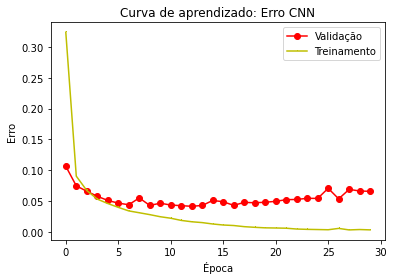

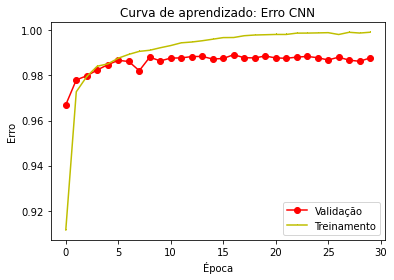

In [27]:
plt.figure()
plt.plot(history.epoch, history.history['val_loss'], 'o-r', label="Validação")
plt.plot(history.epoch, history.history['loss'],',-y', label="Treinamento")
plt.title("Curva de aprendizado: Erro CNN")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.legend()

plt.figure()
plt.plot(history.epoch, history.history['val_accuracy'], 'o-r', label="Validação")
plt.plot(history.epoch, history.history['accuracy'],',-y', label="Treinamento")
plt.title("Curva de aprendizado: Erro CNN")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.legend()